<a href="https://colab.research.google.com/github/shakshisinghai/Comparing-different-Classification-Models-on-MNIST/blob/master/MNIST_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from matplotlib import pyplot as plt
import random
from collections import Counter
import numpy as np

from sklearn.linear_model import LogisticRegression 
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error


##Loading MNIST dataset.

Returns
Tuple of Numpy arrays: (x_train, y_train), (x_test, y_test).

In [3]:
((x_train, y_train), (x_test, y_test))=tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


##Data Analysis
This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.


x_train, x_test: uint8 arrays of grayscale image data with shapes (num_samples, 28, 28).

y_train, y_test: uint8 arrays of digit labels (integers in range 0-9) with shapes (num_samples,).

In [4]:
print(type(x_train), type(y_train))
print(x_train.shape, y_train.shape)
#print(x_train[0], y_train[0])

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(60000, 28, 28) (60000,)


> Plotting 25 random digit images from the training set.

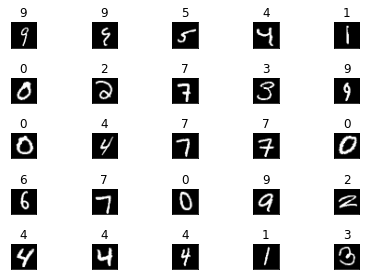

In [ ]:

n=5
j=1
rand=[random.randint(1,6000) for i in range(1,n*n+1)]
for i in rand:
  plt.subplot(n,n,j)
  plt.imshow(x_train[i],cmap='gray')
  plt.title("{0}".format( y_train[i]))
  plt.xticks([], [])
  plt.yticks([], [])
  j+=1
  

> Histogram to represent counts of digit in training and test set


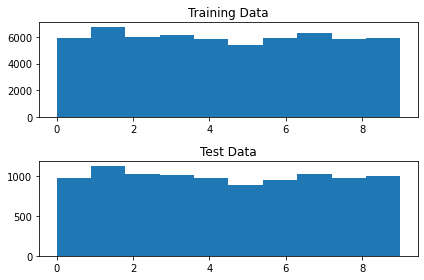

In [ ]:
plt.subplot(2,1,1)
plt.hist(y_train, range=(0,9))
plt.title("Training Data")

plt.subplot(2,1,2)
plt.hist(y_test, range=(0,9))
plt.title("Test Data")

plt.tight_layout()



> Bar plot to represent the Count of digits in Training set.

autolabel: A bar plot with height labels on individual bars.



In [13]:

count=Counter(y_train)
count=sorted(list(dict(count).items()))
count=np.array(count)
digitcount=(count[:,1])
print(count[:,0])

[0 1 2 3 4 5 6 7 8 9]


Text(0.5, 0, 'Digit')

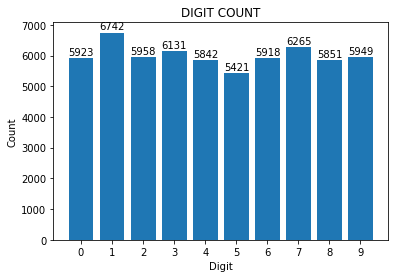

In [ ]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                    xy=(rect.get_x(), height+100)
                    )
plt.tight_layout()
rects = plt.bar(x = count[:,0], 
                height=digitcount, 
                width=0.8, 
                tick_label=count[:,0])
autolabel(rects)
plt.title('DIGIT COUNT')
plt.ylabel('Count')
plt.xlabel('Digit')

## Changing the shape of the data


In [4]:
x_train=x_train.reshape(len(x_train), -1)
x_test=x_test.reshape(len(x_test), -1)
print("After Reshaping x_train:{0} and x_test:{1}".format(x_train.shape, x_test.shape))


After Reshaping x_train:(60000, 784) and x_test:(10000, 784)


##Train


###LogisticRegression

In [5]:
model= LogisticRegression(fit_intercept=False)

model.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_pred=model.predict(x_test)
logistic_error=(mean_squared_error(y_test, y_pred))
print(logistic_error)

score = model.score(x_test, y_test)
logistic_accuracy=score*100
print("{0}%".format(score*100))


1.305
92.38%


### Support Vector Machine 

 SVM objective is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points and have maximum distance between data points of classes.

In [7]:
clf = svm.SVC()
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
y_pred=clf.predict(x_test)
svm_error=(mean_squared_error(y_test, y_pred))
score = clf.score(x_test, y_test)
svm_accuracy=score*100
print(score*100)

97.92


###Stochastic Gradient Descent

‘stochastic‘ means a process that is linked with a random probability. Here a few samples are selected randomly instead of the whole data set for each iteration.

Useful:
* When you have a million samples in your dataset
  * Uses only a single sample, i.e., a batch size of one, to perform each iteration. The sample is randomly shuffled and selected for performing the iteration.






In [ ]:
sgdc = SGDClassifier(loss="log", penalty="l2", max_iter=5)
sgdc.fit(x_train, y_train)

In [8]:
y_pred=sgdc.predict(x_test)
sgdc_error=(mean_squared_error(y_test, y_pred))
score = sgdc.score(x_test, y_test)
sgdc_accuracy=score*100
print(sgdc_error)
print(score*100)


2.1052
88.14999999999999


In [15]:
error=[logistic_error, svm_error,sgdc_error]
#error=[1.305,0.4148,2.1052]
accuracy=[logistic_accuracy,svm_accuracy,sgdc_accuracy]
#accuracy=[92.38,97.92, 88.15]

##Error Comparision of Models

Text(0.5, 0, 'Model')

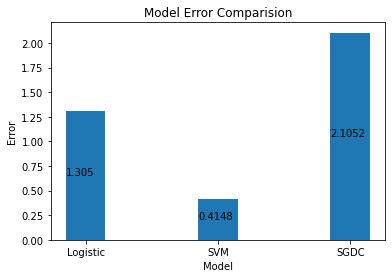

In [11]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}'.format(height),
                    xy=(rect.get_x(), height/2)
                    )

plt.tight_layout()
rects = plt.bar(x = [1,2,3], 
                height=error, 
                width=0.3, 
                tick_label=['Logistic', 'SVM','SGDC'])

autolabel(rects)
plt.title('Model Error Comparision')
plt.ylabel('Error')
plt.xlabel('Model')

##Accuracy Comparision of Models

Text(0.5, 0, 'Model')

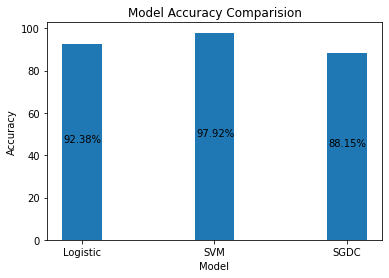

In [17]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        plt.annotate('{}%'.format(height),
                    xy=(rect.get_x()+0.01, height/2)
                    )

plt.tight_layout()
rects = plt.bar(x = [1,2,3], 
                height=accuracy, 
                width=0.3, 
                tick_label=['Logistic', 'SVM', 'SGDC'])

autolabel(rects)
plt.title('Model Accuracy Comparision')
plt.ylabel('Accuracy')
plt.xlabel('Model')